<a href="https://colab.research.google.com/github/Marrs-jin/MLTSA_AMarrs/blob/master/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will need a few unusual libraries

In [1]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=99d65557b02356afc059a94b5f6c9f54cd6e586054b8ce19e27f8ffb5f24ec31
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
     |████████████████████████████████| 215kB 3.5MB/s 


In [2]:
#system options you will need
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

from github import Github

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
np.set_printoptions(threshold=sys.maxsize)
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd /content/gdrive/My\ Drive/MLTSA2020/


/content/gdrive/My Drive/MLTSA2020


In [6]:
cd hw7/

/content/gdrive/My Drive/MLTSA2020/hw7


# I am going to download data from someone's github repo
One of you asked me earlier in the semester how one would so this. We will use data from Salika Dave, a student at Mumbai tech who stored some soundbites on her GitHub repo.

In [0]:

# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()



In [0]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")

In [9]:
wavfiles = repo.get_contents("voices")
wavfiles


[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [0]:
path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(path,f.path)
    os.system(cmd)

In [11]:
%ls

Jarvisd_template.wav    Tofftl_template.wav.1   Tontte_template.wav.2
Jarvisd_template.wav.1  Tofftl_template.wav.2   Tontth_template.wav
Jarvisd_template.wav.2  Tofftlu_template.wav    Tontth_template.wav.1
Jarvise_template.wav    Tofftlu_template.wav.1  Tontth_template.wav.2
Jarvise_template.wav.1  Tofftlu_template.wav.2  Tontt_template.wav
Jarvise_template.wav.2  Tontld_template.wav     Tontt_template.wav.1
Jarvish_template.wav    Tontld_template.wav.1   Tontt_template.wav.2
Jarvish_template.wav.1  Tontld_template.wav.2   Tonttu_template.wav
Jarvish_template.wav.2  Tontle_template.wav     Tonttu_template.wav.1
Jarvis_template.wav     Tontle_template.wav.1   Tonttu_template.wav.2
Jarvis_template.wav.1   Tontle_template.wav.2   Ttatd_template.wav
Jarvis_template.wav.2   Tontlh_template.wav     Ttatd_template.wav.1
Jarvisu_template.wav    Tontlh_template.wav.1   Ttatd_template.wav.2
Jarvisu_template.wav.1  Tontlh_template.wav.2   Ttate_template.wav
Jarvisu_template.wav.2  Tontl_templat

In [12]:
filenames = np.sort(glob.glob("*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (pl.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (pl.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (pl.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (pl.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (pl.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [13]:
for k,v in colors.items():
        print(k,v)

Jarvis ((0.267004, 0.004874, 0.329415, 1.0), 'Jarvis')
Tofftl ((0.229739, 0.322361, 0.545706, 1.0), 'Turn off the lights')
Tontl ((0.127568, 0.566949, 0.550556, 1.0), 'Turn on the lights')
Tontt ((0.369214, 0.788888, 0.382914, 1.0), 'Turn on the TV')
Ttat ((0.993248, 0.906157, 0.143936, 1.0), 'Turn the air temperature')


#Data Exploration and Visualization 
## plot the sound bites
the sound bites are read in as numpy array by the ```scipy.io.wavfile``` module. The dataset is comprised of 5 soundbites for each of 5 sentences. The word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature". Each sound bite, for each sentence, is read by a different person, with different accents, genders, and background noise. if you install the pydub  module and run the notebook locally you can hear each soundbite in this loop (wont play on google colab).

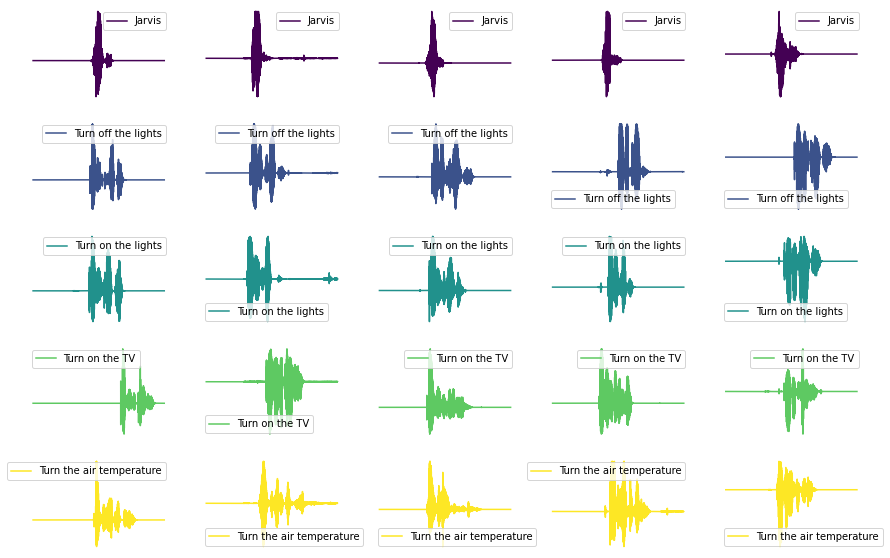

In [14]:
fig = pl.figure(figsize(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play
for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f: 
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    ax.axis('off')              
    pl.legend()

Figure 1: 25 sound bites read in as arrays from the original *.wav* file. The arrays represnet sound intensity *vs* time, but the spectral sound information (frequency) is lost.  These are therefore simplified representations of the original data. 
Each of 5 sentences is recorded as spoken by a different person in a different environment: the word "Jarvis", the sentences "Turn off the lights", "Turn on the lights", "Turn on the TV", and "Turn the air temperature".  In the above plot, each row is a different sentence (also plotted with a different color). The content of the soundbite is written on top of the wave plot.  At a glance, the soundbites show some similarities within the same sentence, mostly in the duration of the speech. We also note that the starting point of the speech is not homogeneous within the recorded segment.

The following analysis could be implemented in the full spectral-features dataset, but the current 1-dimensional representation of the data alows for a simpler implementation of the methods.

In [15]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## downsampling the large arrays 
each sound bit is stored in an array of 64000 elements. To work effectively we will downsample them by a factor of 10. Occasionally I will downsample it further.

Since classifying these sound mites will require generating distance arrays, we want to know ahead of time what we are getting ourelves into. We are working with foating point numbers
- 64 bits per number
We want to build 2D arrays that are NxN sized where N is the length of the soundbite array (64,000)
- 64000x64000
- 1 GB is 8e9 bit
## *task 1: Print out the amount of memory in Gigabytes (or Megabytes where needed) that would take to create a single distance matrix, a distance matrix subsampling the array by 10, by 8, and by 100*

In [16]:
print("calculating a distance matrix for the full files would requires " + 
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " + 
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 10 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [0]:
steps = 10

In [0]:
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [19]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

inspect the sound bites: the original array and the downsampled, normalized ones. 

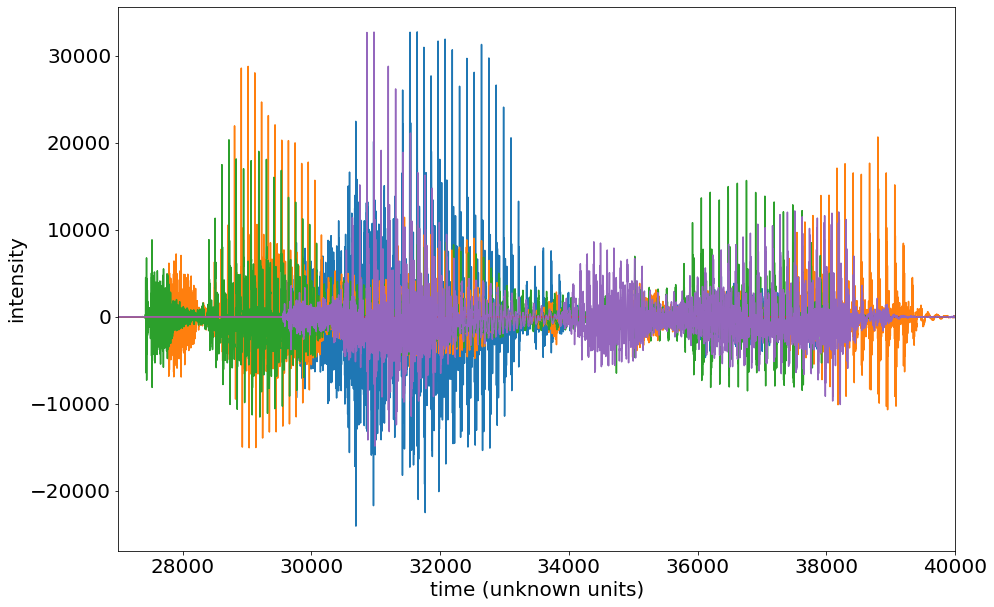

In [20]:
pl.rcParams['font.size'] = 20
pl.plot(wavfiles[0])
pl.plot(wavfiles[5])
pl.plot(wavfiles[10])
pl.plot(wavfiles[15])
pl.plot(wavfiles[20])
pl.xlim(27000, 40000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("intensity", fontsize=20);

Figure 2: the first sound bite for each sentene, the core portion of the array only is shown, elements 27000-40000 of 64000.


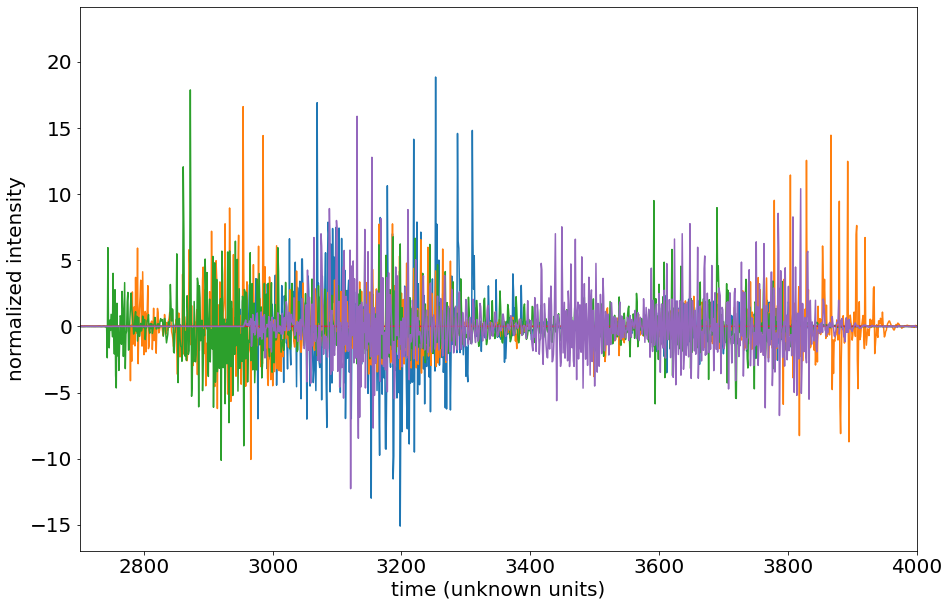

In [21]:
pl.rcParams['font.size'] = 20
pl.plot(X[0])
pl.plot(X[5])
pl.plot(X[10])
pl.plot(X[15])
pl.plot(X[20])
pl.xlim(2700, 4000)
pl.xlabel("time (unknown units)", fontsize=20)
pl.ylabel("normalized intensity", fontsize=20);

Figure 3: Same as figure 2 but for the standardized arrays, downsampled by a factor 10 by selecting every 10th datum.

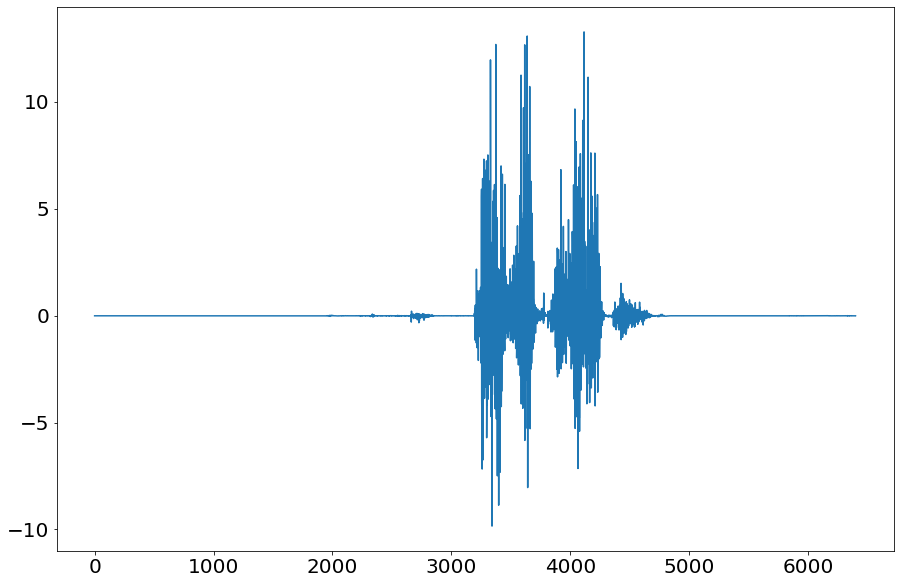

In [22]:
pl.plot(X[8])

Figure: Test to see what a wave file looks like on its own. 

# Calculating distance between sound bites
# Naive distsances between two arrays
Plot the distance between each pair of the 25 sound bites. The distance matrix should be 25x25 and each entry should be a naive distance calculated between the 2 arrays. 

The naive distance can be the sum of the difference between entries of the array at the same time stamp, i.e. along the diagonal, or its absolute value, which would correspond to the L1 metric

In [0]:
def naive_distances(a, b):
    return (a - b).sum()
def l1(a, b):
    return (np.abs(a - b)).sum()

In [24]:
X[:,::steps]

array([[ 6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.76776212e-03,  6.01527906e-03,  6.76776212e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  5.26279600e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.76776212e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.76776212e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.76776212e-03,  6.76776212e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-03,
         6.01527906e-03,  6.01527906e-03,  6.01527906e-0

to save time I am resampling again by the same step. This is equivalent to resampling by 100

## *task 1: explain the figures*

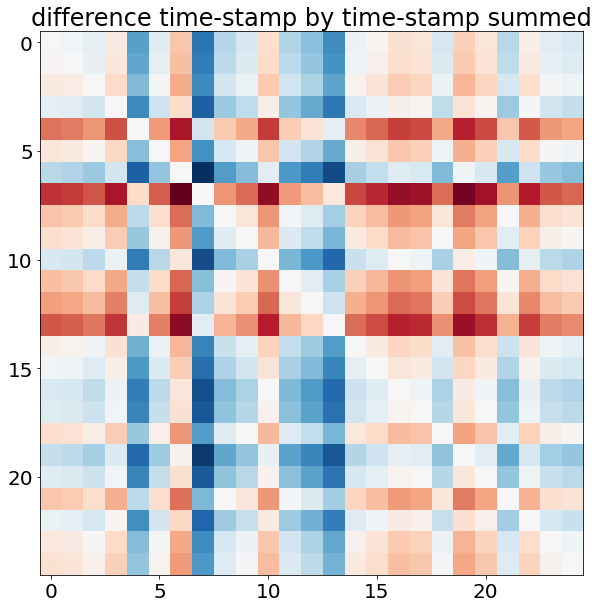

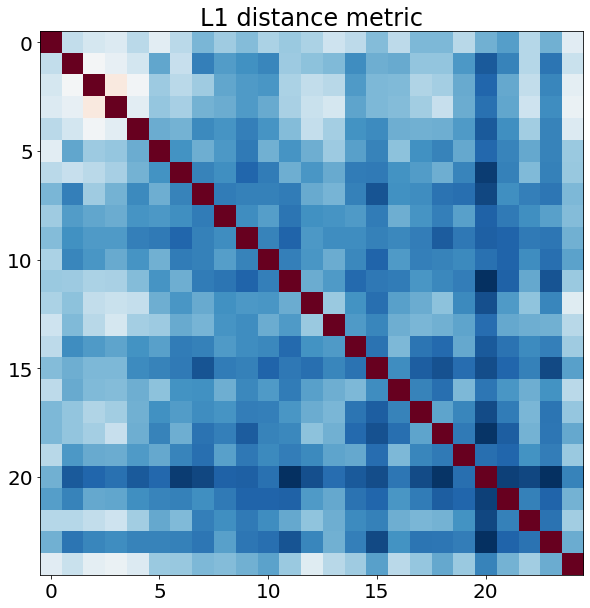

In [25]:
pl.imshow(cdist(X[:,::steps], 
               X[:,::steps], metric=naive_distances), 
         cmap="RdBu")
pl.title("difference time-stamp by time-stamp summed")
pl.figure()
pl.imshow(cdist(X[:,::steps], 
               X[:,::steps], metric=l1), 
         cmap="RdBu")
pl.title("L1 distance metric");


Figure 3: distance metric for the standardized sound arrays downsized by a factor of 10. Distance found for every 10 distances in "naive" (direct subtraction) and Euclidean (absolute value of difference). Distances are distance from itself (so y = 5, x = 10 is distance from the 5th timestamp in X to 10th). No distinct pattern really catches my eye. However, we do see the 1-to-1o ratio along the diagonal for Euclidean, which is good. The distance from am object to itself (for example where x = 10, y = 10) should be zero. 

# Pairwise time-stamps distance: each time series is a vector, so we can look at the timestamp-to-timestamp distance matrix

This is the object whose diagonal you summed over to get the naive distances and the L1 distances above.
For the full sample array this should be a 64000x64000 array. It is ok to calculate the distance and plot the stanradrized arrays, further downsampled by 10 (640x640 array)

use ```scipy.spatial.distance.cdist()``` and the L1 metric that was created earlier

## *task 2 comment on the following 2 figures*

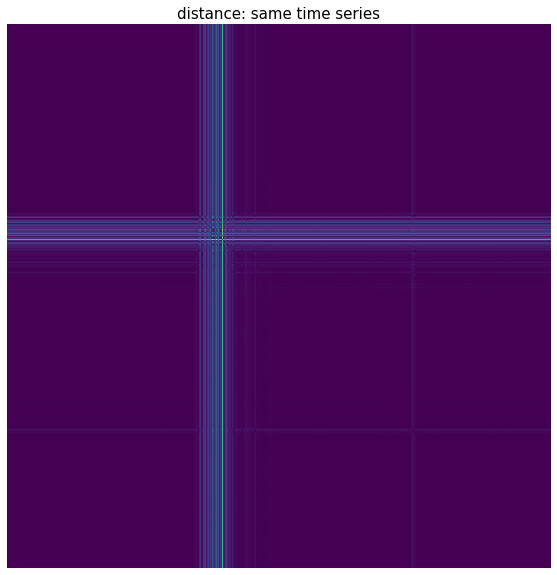

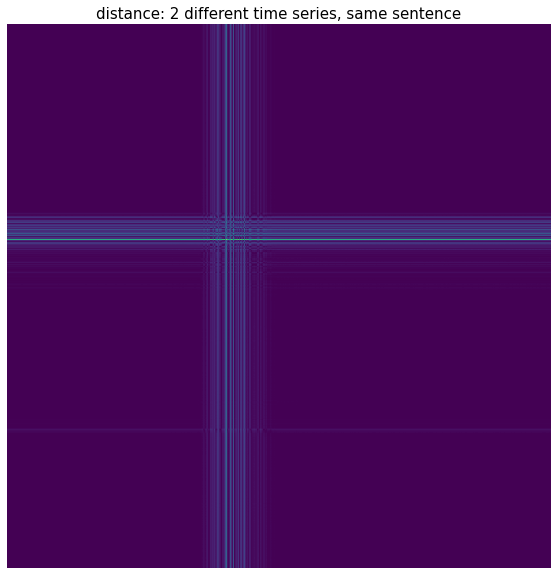

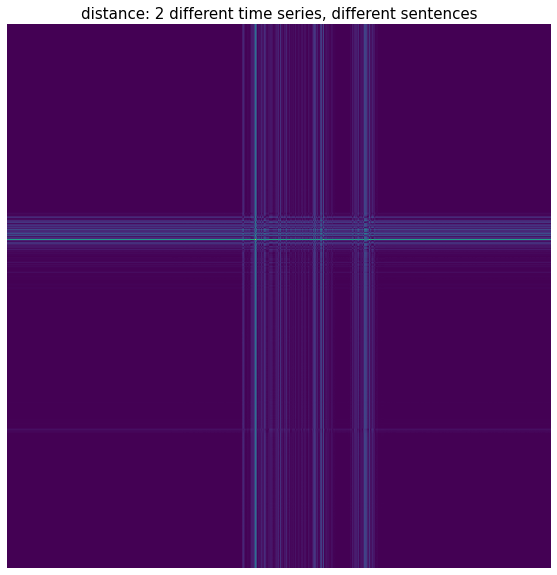

In [26]:
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[1][::steps]).T,
      metric=l1))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[2][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.figure()
pl.imshow(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[10][::steps]).T,
      metric=l1))
pl.title("distance: 2 different time series, different sentences", 
         fontsize=15);
pl.axis('off');


Figure 4: mapping Euclidean distance for the standardized, reduced wave files. The first is finding distance of the second sound bite of the first sentence.  Graph 2 finds distance between Soundbite [1] and [2], which show strong similarities. This is to be expected since they are for the same sentence. The last graph is for different sentences and different speakers and does not show the same similarities. The Figure below helps to see what is going on. 

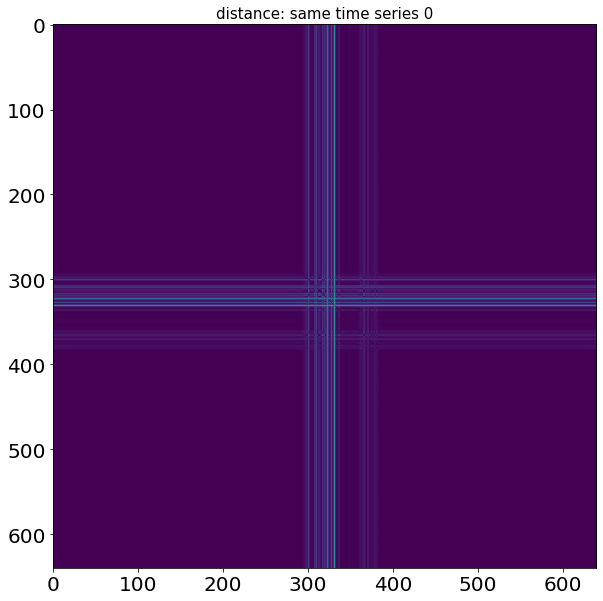

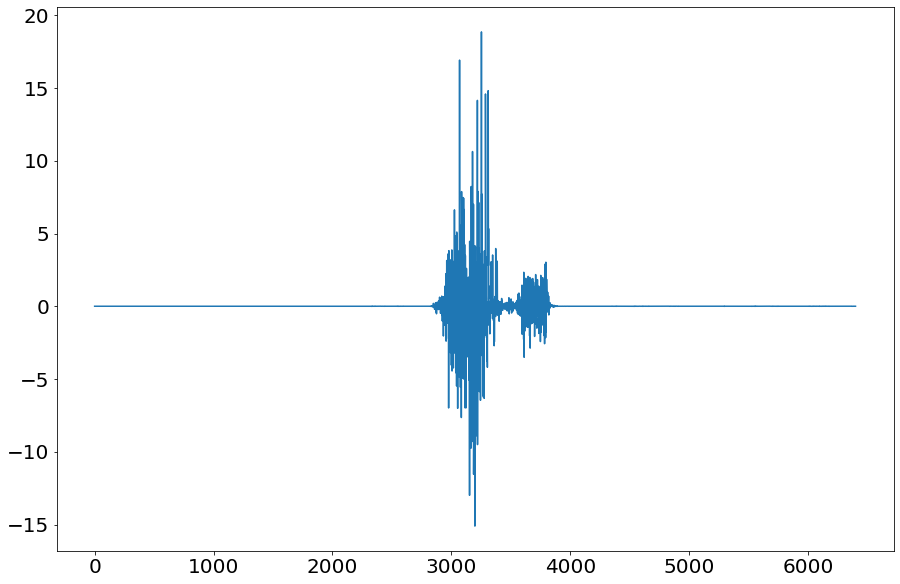

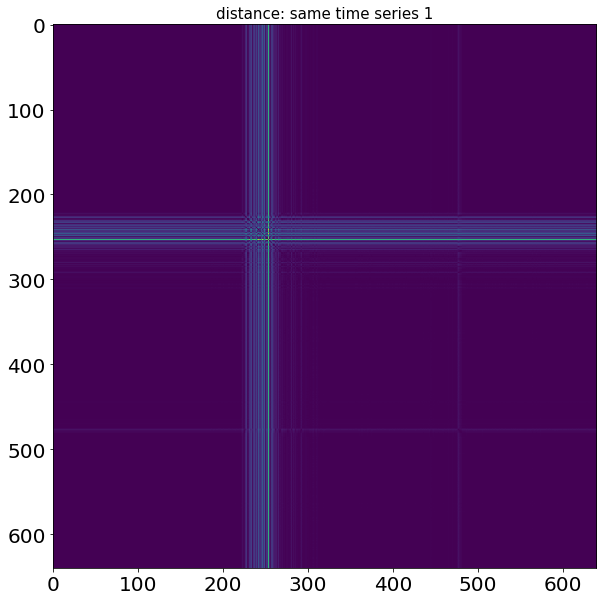

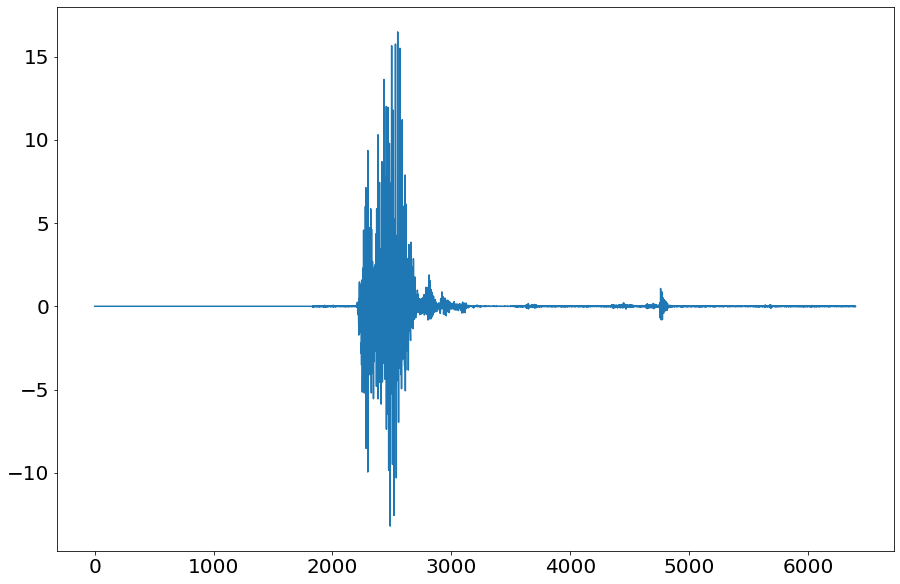

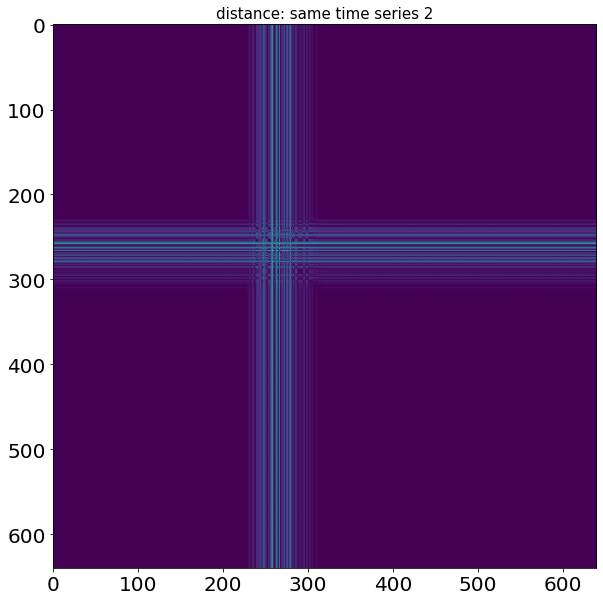

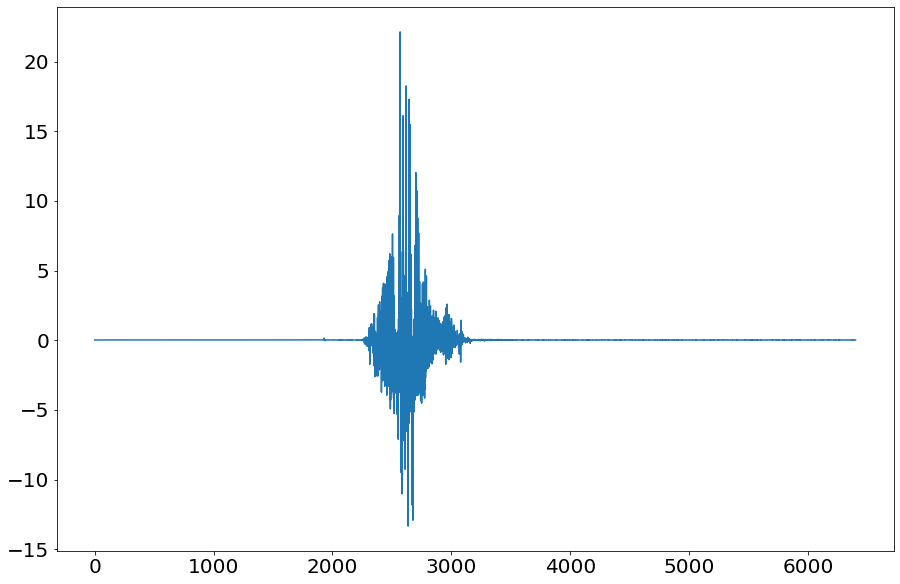

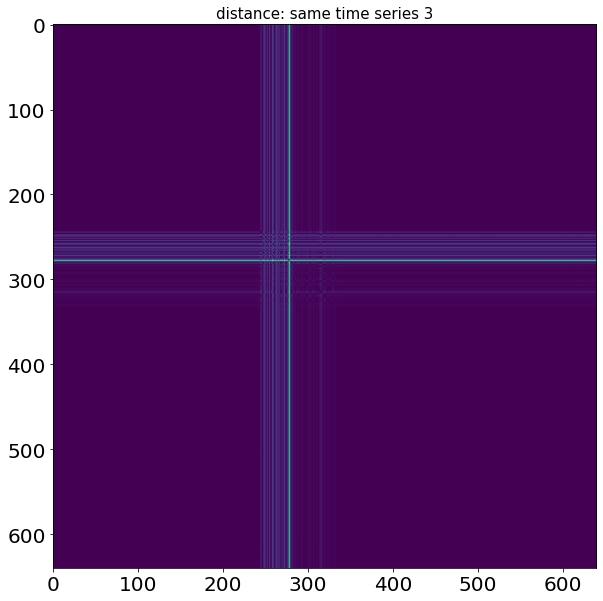

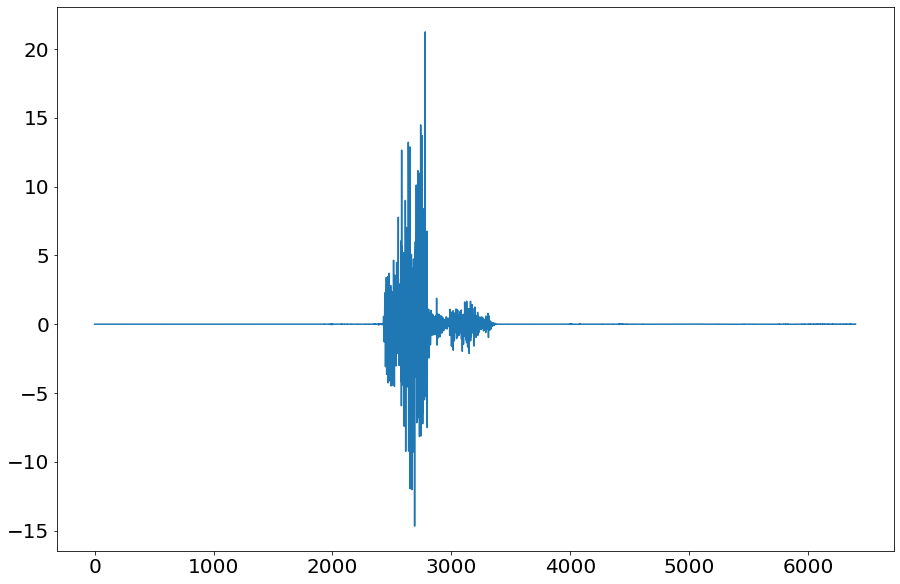

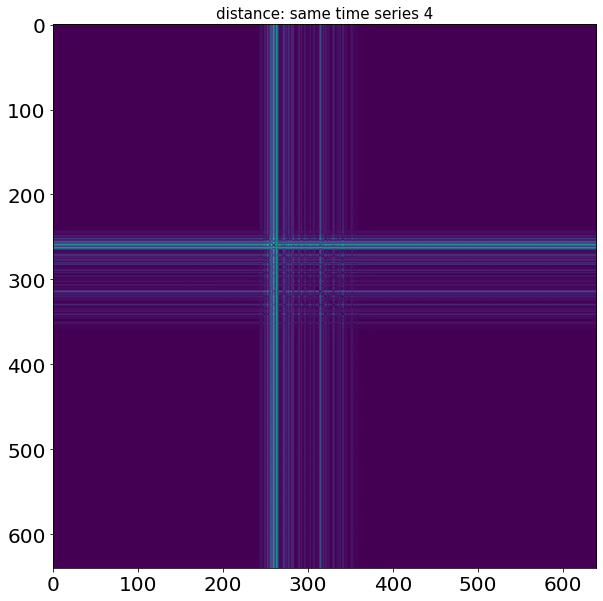

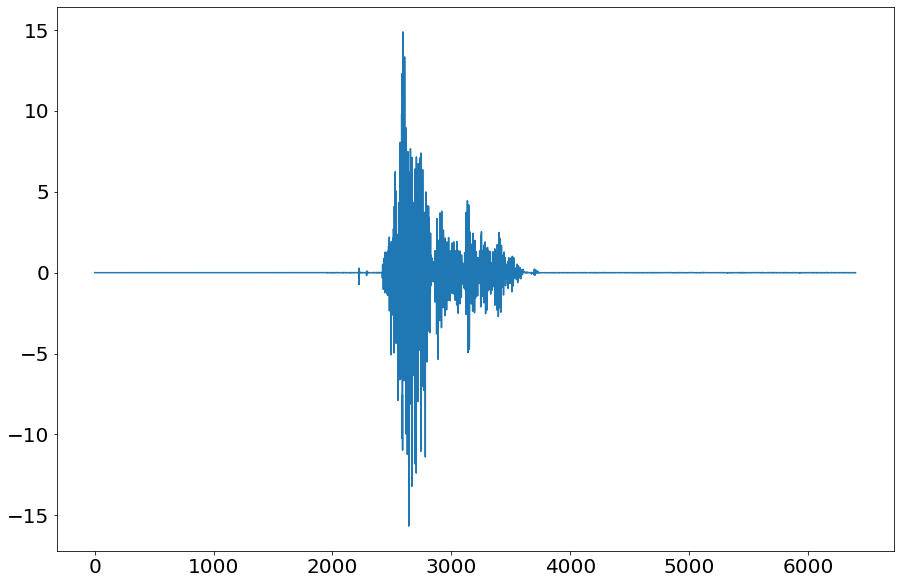

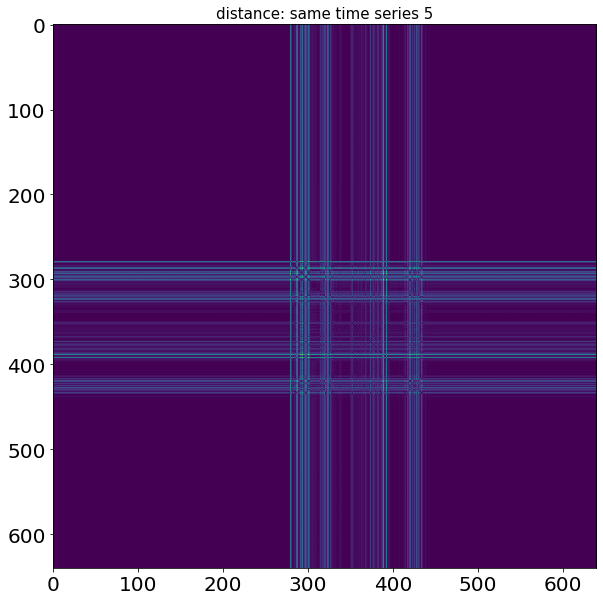

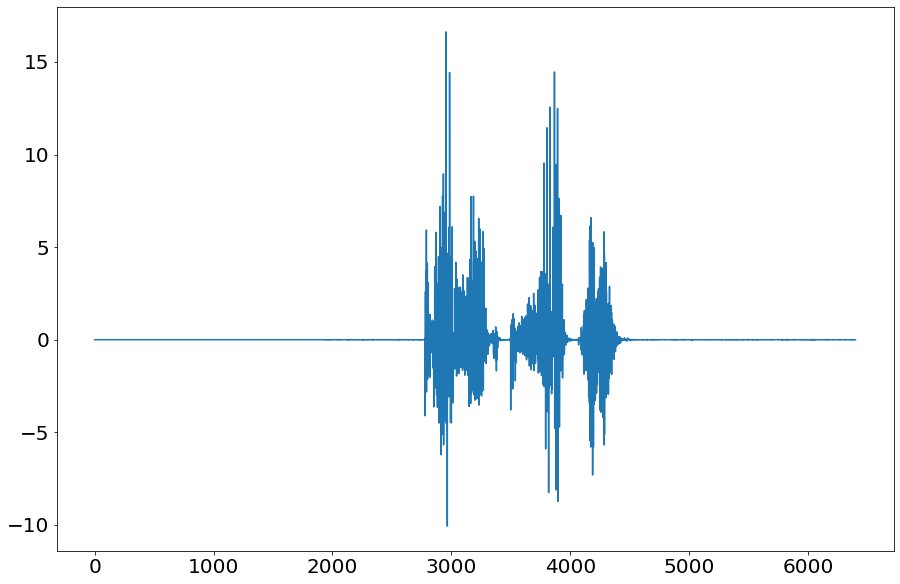

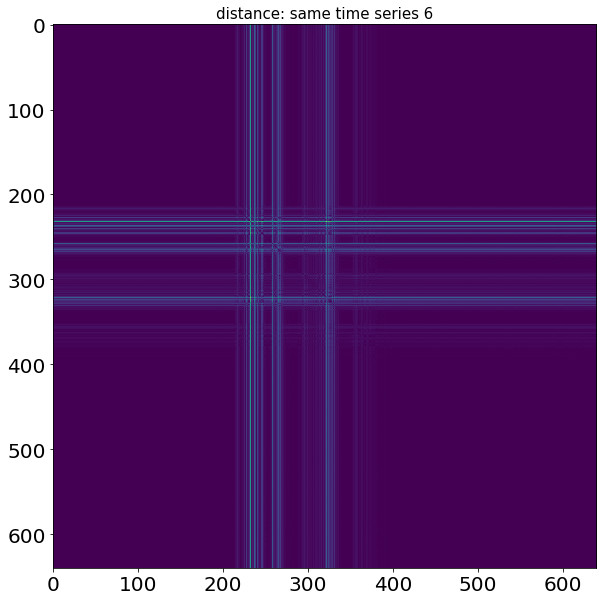

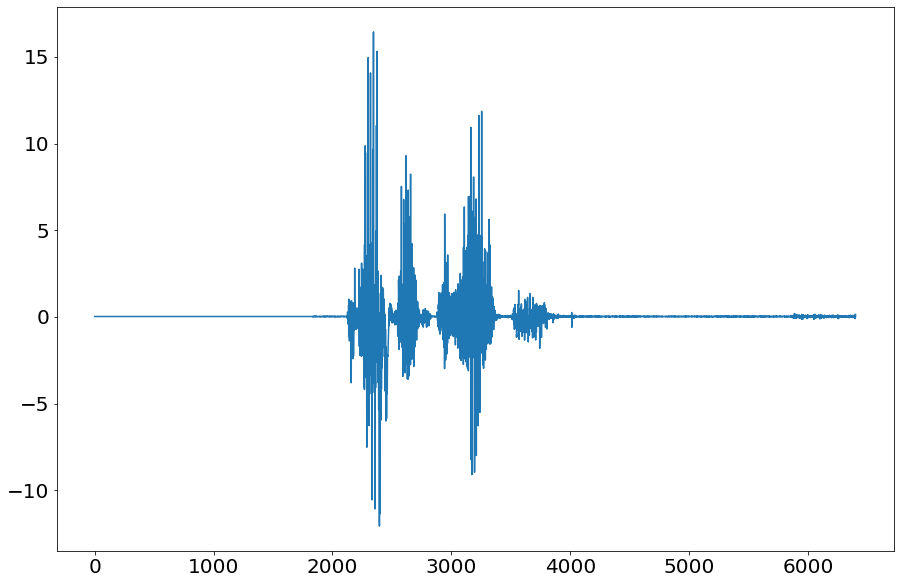

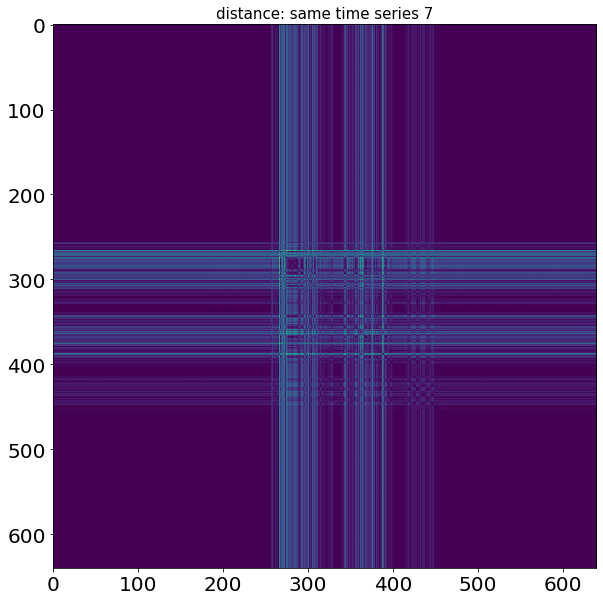

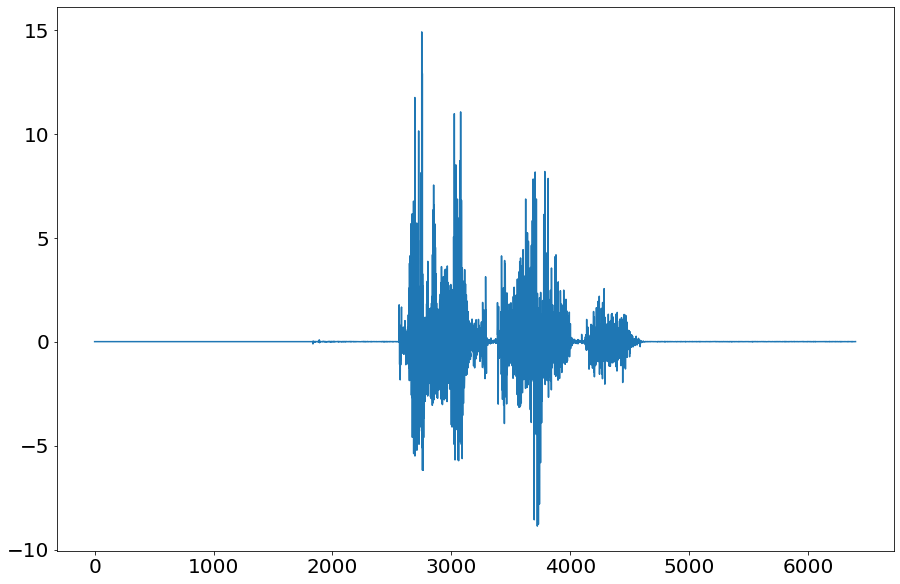

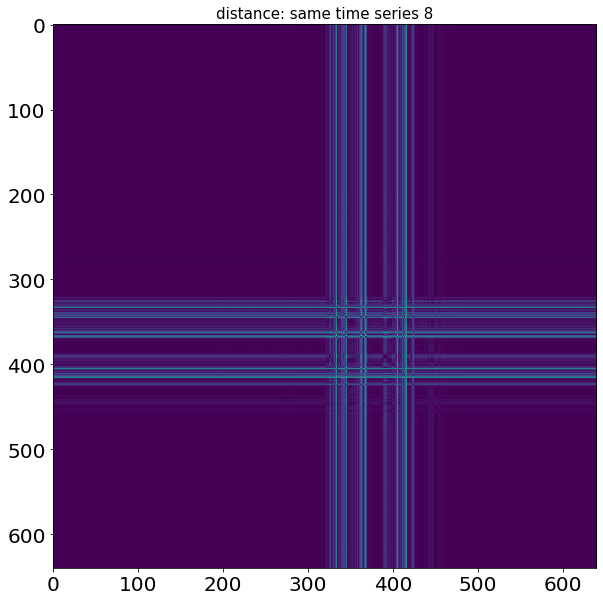

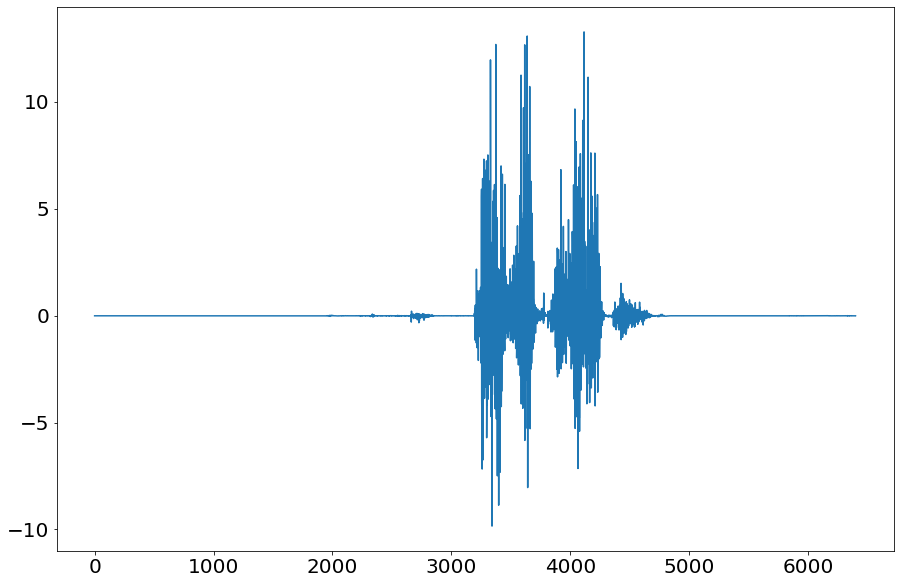

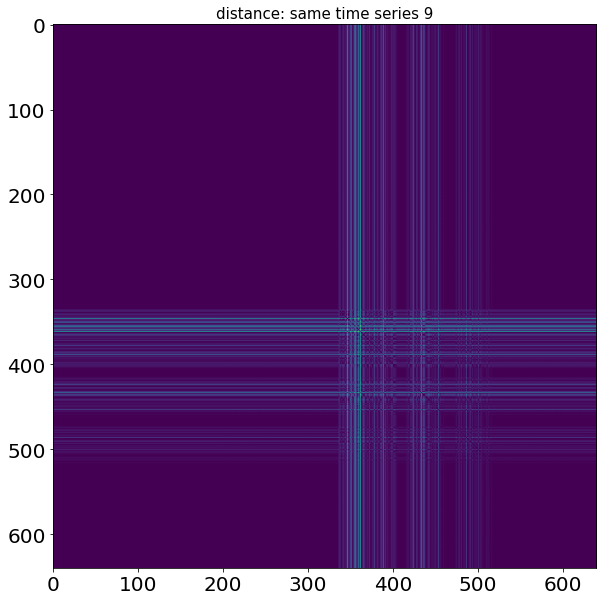

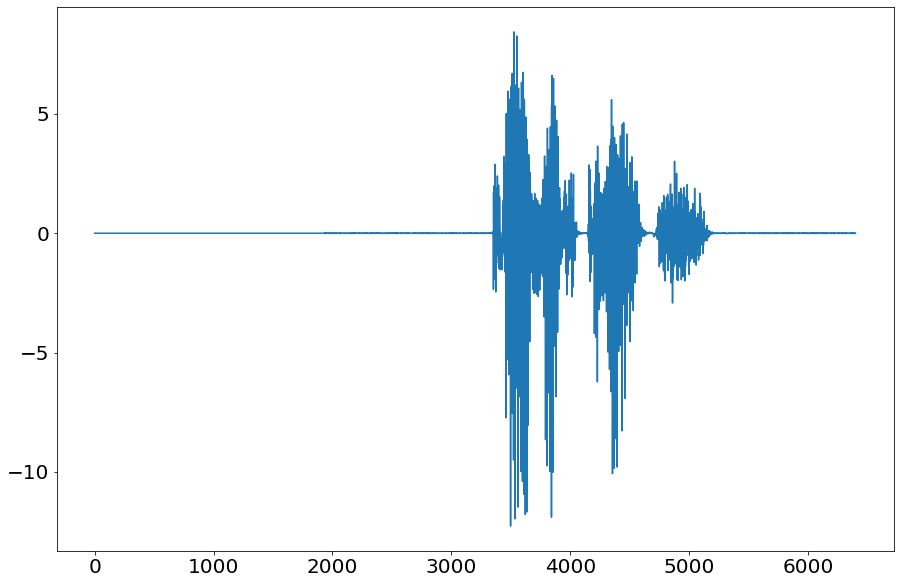

<Figure size 1080x720 with 0 Axes>

In [27]:
for i in range(0,10):
  pl.imshow(cdist(np.atleast_2d(X[i][::steps]).T, 
                  np.atleast_2d(X[i][::steps]).T,
        metric=l1))
  pl.title("distance: same time series %s" %i, fontsize=15)
  pl.axis('on')
  pl.show()
  pl.plot(X[i])
  pl.figure()


Figure: Illustrative tool to understand what the distance figures show. Each distance (calculated vs itself) is shown, and underneath is the time series it was done on. You can see similarities in groups of 5 (from 5 of the same sentence, different speakers) in both the waveform and the peak (bright green line) of the distance graph. Lines in the distance graph show (via brightness) how sharp a peak there is at that point, and show (via density) how much spread there is. Graph 5 for example has several "peaks" shown with several sections of bright lines on the distance graph. 

because it is very hard to tell whatis going on in the plots above let's replot with the color in logscale

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


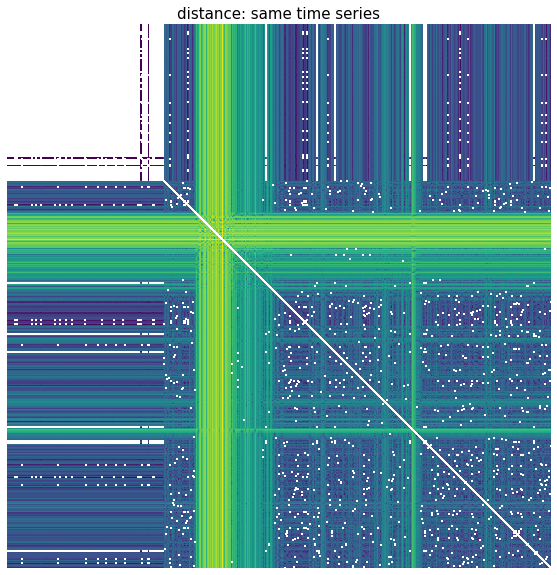

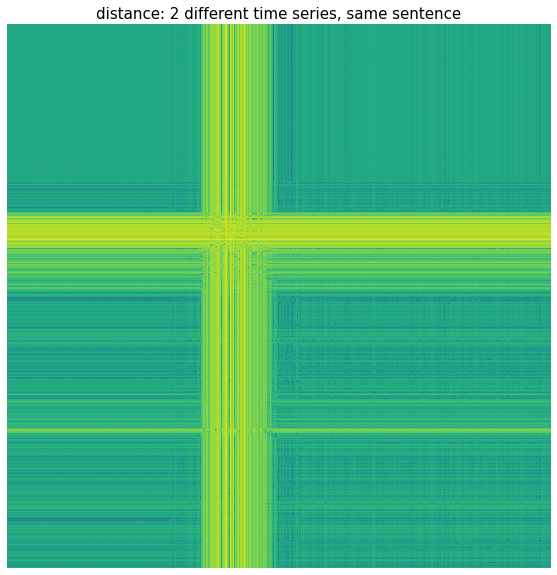

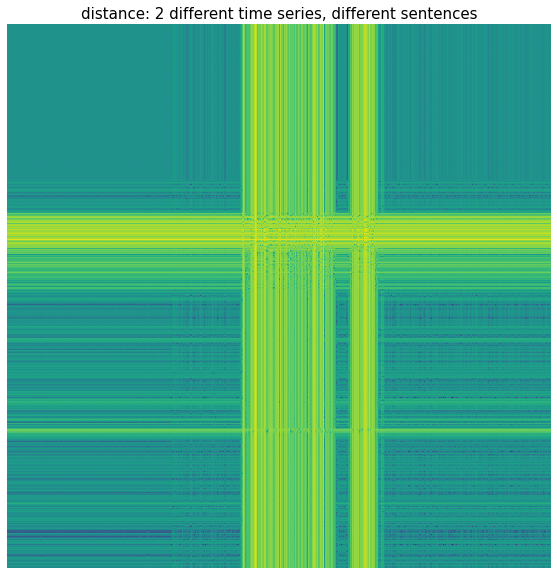

In [28]:
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[1][::steps]).T,
      metric=l1)))
pl.title("distance: same time series", fontsize=15)
pl.axis('off')
pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[2][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, same sentence", fontsize=15);
pl.axis('off')
pl.figure()
pl.imshow(np.log10(cdist(np.atleast_2d(X[1][::steps]).T, 
                np.atleast_2d(X[10][::steps]).T,
      metric=l1)))
pl.title("distance: 2 different time series, different sentences", 
         fontsize=15);
pl.axis('off');


Figure 5: Same as figure 4 but in log scale. Makes the spread and intensity easier to see. Now it is clear that the distance is isolating amplitude and spread for the waveforms. 

## Computing the distance between all pixel pairs is also prohibitively slow. Do doit I further resampled the array by another factor of 10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


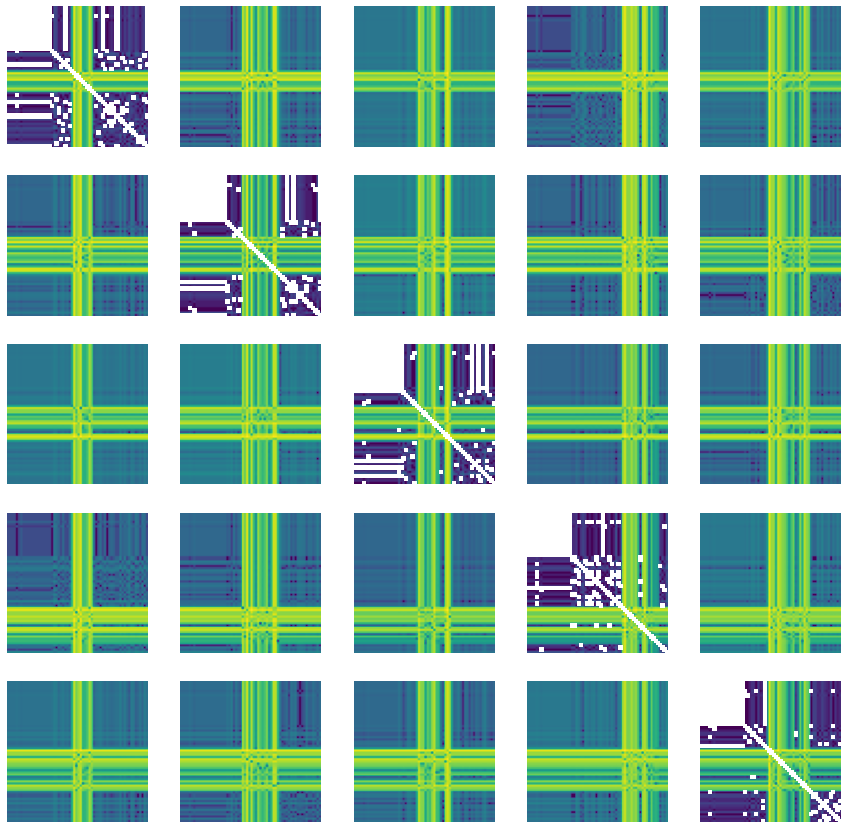

In [29]:
restep = 100
fig = pl.figure(figsize(15, 15))

for i in range(0,25,5):
    for k, j in enumerate(range(0,25,5)):
        ax = fig.add_subplot(5,5,i + k + 1)
        pl.imshow(np.log10(cdist(np.atleast_2d(X[i][::restep]).T, 
                np.atleast_2d(X[j][::restep]).T, 
          metric=(lambda x,y: np.abs(x - y)))))
        pl.axis('off');

Figure 6: same as figure 5 for all pairs of sound bites

# DTW distance
The DTW algorithm calculates the distance as the sum along a path in the  pair-wise distance matrix that minimized the distance between points, at the cost of increasing the length of the path. The simple Euclidean distance between 2 matrices would be the sum along the diagonal. In DTW this sum is modified to be the sum over the elements as follows:


$DTW(Q_i, C_j) = d(Q_i, C_j) + min(d(Q_{i-1}, C_{j-1}), d(Q_{i-1}, C_j), d(Q_i, C_{j-1})) $
Where $d$ is the distance between 2 time stamps: e.g. the absolute value of thedifference (L1)

The algorithm has the following rules:

- Every index from the first sequence must be matched with one or more indices from the other sequence and vice versa
- The first index from the first sequence must be matched with the first index from the other sequence (but it does not have to be its only match)
- The last index from the first sequence must be matched with the last index from the other sequence (but it does not have to be its only match)
- The mapping of the indices from the first sequence to indices from the other sequence must be monotonically increasing, and vice versa, i.e. if j > i are indices from the first sequence, then there must not be two indices l > k in the other sequence, such that index i is matched with index l and index j is matched with index k , and vice versa

Remember that you will need to start with the L1 distance: at every step you will need to know the L1 distance for several surrounding cells. While you could calculate it on the spot it is more computationally efficient in python to calculate it for the whole array at once, as long as you can store the whole array in memory. Solving this with "dynamic coding", you can calculate all pair-wise distances first, storing the distance matrix, then find the path along the matrix and calculating the DTW distance by looking up values of the relevant cells. Pairwise L1 distance can be caluclated for the entire matrix with ```scipy.spatial.distance.cdist```

With that in mind, create a function that given x and y, two np.arrays of n and m elements respectively, returns 
 - the DTW distance
 - the DTW distance matrix 
 - the path along the matrix as x-y indices (look in the slides if you need help with this one: I added the code in there) 

Make sure your function called *dtw()* and make sure that it has a "docstring' that complies to PEP conventions https://www.python.org/dev/peps/pep-0257/



Run your function for the soundbite arrays using every 100th datapoint and plot the array and the path along the array
 - for the first normalized sound array matched with itself
 - for the first normalized sound array matched with another normalized sound array of the same phrase:  soundbites are the same sentence 5 by 5: 0-4 same sentence, 5-9, 10-14, 15-19, 19-20
 - for the first unnormalized sound array matched with another unnormalized sound array, the same one as in the previous step
 - any two other normalized arrays, not the same sentence. 
 
What is the path for the first array you plotted? Why?

In [0]:
#Steps:
#Create empty array of dtw distances, 2d array of size NxM
#Set every value in that array to infinity
#Initalize first element to be 0, this is where to start


In [0]:
#math tails, no cross, nothing left out
def dtw(a, b, show = False):
  """
  a is a N dimensional array 
  b is a M dimensional array
  Computes dynamic time warping distance between a and b
  returns 2-D array shape NxM of dtw distances
  Distance between a and b is the last element in the returned array
  """
  N = len(a)
  M = len(b)
  D = np.zeros((N+1, M+1)) #2-D array that will store distances. NxM dimenisions
  #set every element to infinity, except for first index which is where we will start
  for i in range(N + 1):
    for j in range(M + 1):
      D[i, j] = np.inf
  D[0, 0] = 0

  for i in range(1, N + 1): #start at first element after 0
    for j in range(1, M + 1):
      Euc_dis = abs(a[i - 1] - b[j - 1] ) #Euclidean distance of previous points
      min_nearby = np.min([D[i -1, j -1], D[i - 1, j], D[i, j - 1]]) #minimum of nearby points. Think of an "X" where bot right leg is ith index, top right is jth index. And leg connecting TL and BL
      D[i, j] = Euc_dis + min_nearby
  return D[-1,-1]

2.0

## *task 3: write on your own the DTW algorithm. Use the rules above and the pseudocode and equations in the slides* 

## *Extra Credit: code the DTW with a parameter r tha allows to search farther than one step away from the diagonal. Make that r an input to your dtw() function*

In [0]:
def dtw_wide(a, b, r = 0):
  """
  a is a N dimensional array 
  b is a M dimensional array
  r is how far from the diagonal you want to search
  Computes dynamic time warping distance between a and b
  returns 2-D array shape NxM of dtw distances
  Distance between a and b is the last element in the returned array
  """
  N = len(a)
  M = len(b)
  D = np.zeros((N+1, M+1)) #2-D array that will store distances. NxM dimenisions
  #set every element to infinity, except for first index which is where we will start
  for i in range(N + 1):
    for j in range(M + 1):
      D[i, j] = np.inf
  D[0, 0] = 0

  for i in range(1, N + 1): #start at first element after 0
    for j in range(1, M + 1):
      Euc_dis = abs(a[i - 1] - b[j - 1] ) #Euclidean distance of previous points
      if r != 0:
        nearby_points = []
        for i in range(1,N+1):
          for j in range(1,M+1):
            for k in range(0, r+1):
              if k == 0: #to ignore i, j instance
                for l in range(1,r+1):
                  nearby_points.append(D[i-k, j-l])
              else:
                  for l in range(0,r+1):
                    nearby_points.append(D[i-k, j-l])
        min_nearby = np.min(nearby_points) #minimum of nearby points. Think of an "X" where bot right leg is ith index, top right is jth index. And leg connecting TL and BL
      else:
        min_nearby = np.min([D[i -1, j -1], D[i - 1, j], D[i, j - 1]])
      D[i, j] = Euc_dis + min_nearby
  return D[-1,-1]

Next is the closest I could come for the variable size of comparison dtw. 

In [0]:
def dtw_wide(a, b, r = 0):
  """
  a is a N dimensional array 
  b is a M dimensional array
  r is how far from the diagonal you want to search
  Computes dynamic time warping distance between a and b
  returns 2-D array shape NxM of dtw distances
  Distance between a and b is the last element in the returned array
  """
  N = len(a)
  M = len(b)
  D = np.zeros((N+1, M+1)) #2-D array that will store distances. NxM dimenisions
  #set every element to infinity, except for first index which is where we will start
  for i in range(N + 1):
    for j in range(M + 1):
      D[i, j] = np.inf
  D[0, 0] = 0

  for i in range(1, N + 1): #start at first element after 0
    for j in range(1, M + 1):
      Euc_dis = abs(a[i - 1] - b[j - 1] ) #Euclidean distance of previous points
      dist_hold = np.inf
      if r != 0:
        nearby_points = []
        for i in range(1,N+1):
          for j in range(1,M+1):
            for k in range(0, r+1):
              if k == 0: #to ignore i, j instance
                for l in range(1,r+1):
                  if D[i-k, j-l] < dist_hold:
                    dist_hold = D[i-k, j-l]
              else:
                  for l in range(0,r+1):
                    if D[i-k, j-l] < dist_hold:
                      dist_hold = D[i-k, j-l]
        min_nearby = dist_hold #minimum of nearby points. Think of an "X" where bot right leg is ith index, top right is jth index. And leg connecting TL and BL
      else:
        min_nearby = np.min([D[i -1, j -1], D[i - 1, j], D[i, j - 1]])
      #print(dist_hold)
      D[i, j] = Euc_dis + min_nearby
  return D[-1,-1]

## code steps:
- Calculate the distance matrix according to L1
- Set the 0,0 cell to 0
- for all values of the index i; for all values of the index j

  set the DTW[i,j] cell to $L1 + min(l1(Q_{i-1}, C_{j-1}), L1(Q_{i-1}, C_j), L1(Q_i, C_{j-1}))$

- calculate the DTW path
- return the value of the last cell (DTW[-1,-1])  the DTW array, the path

note: you will likely have to have a nested loop but there are extra points if yuo can figure out how to write it without a nested loop (for i...: for j....:)

In [0]:
def dtw_plotter(q, p, step_size):
  pl.imshow(np.log10(cdist(np.atleast_2d(X[p][::step_size]).T, 
                np.atleast_2d(X[q][::step_size]).T,
      metric=dtw)))
  pl.show()
  pl.plot(X[p][::step_size])
  pl.plot(X[q][::step_size]);

Dynamic Time Warped distance is  0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


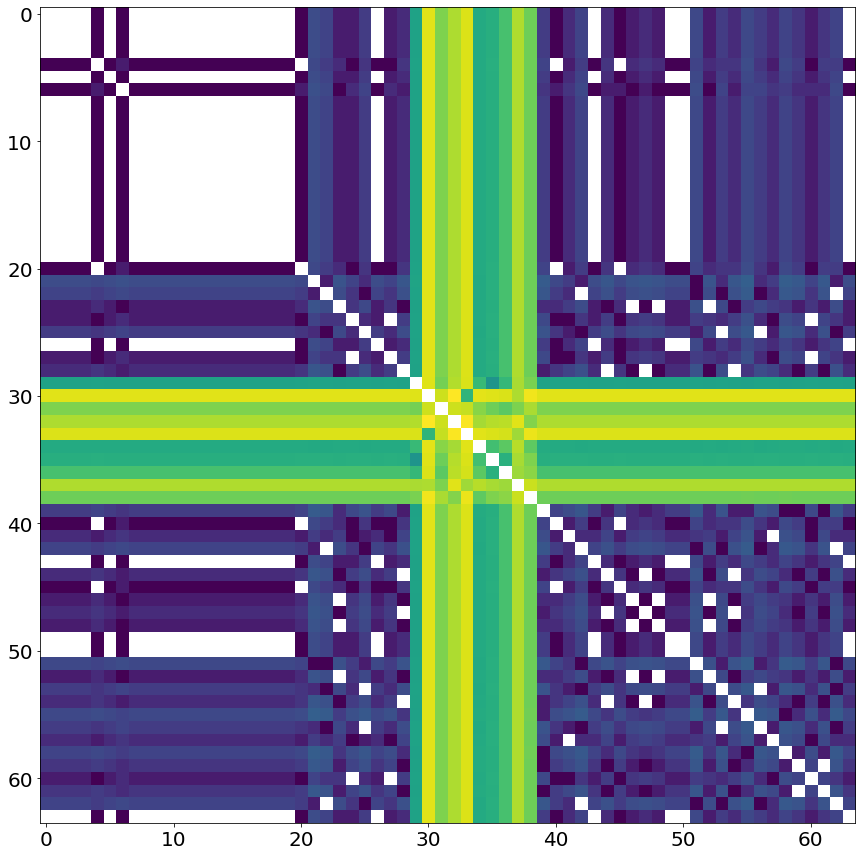

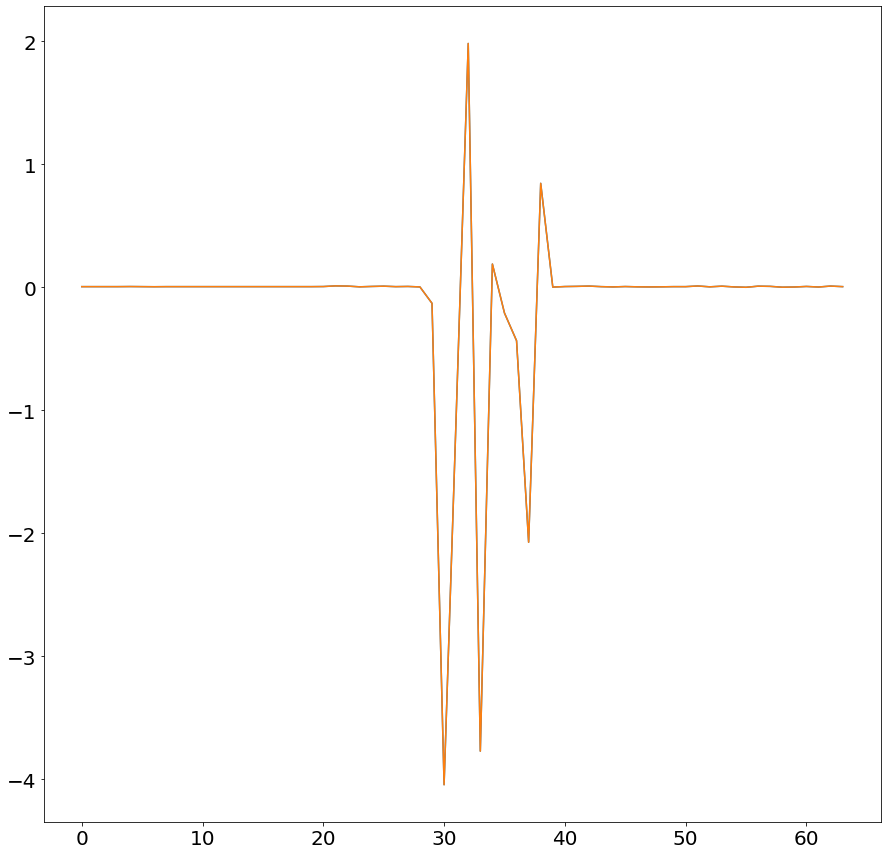

In [33]:
restep = 100
print("Dynamic Time Warped distance is ", dtw(X[0][::restep], X[0][::restep]))
dtw_plotter(0, 0, restep)

Figure: dtw plotter of first sound byte using step size of 100 to downsize. Top graph is dtw distance in a heat map of object vs itself, showing the characteristic diagonal. Below is a plot of that waveform, where we can see that the distance map was picking up on the region of amplitude (30-40) by where it had darker (green) lines. 

Note: to get same results as notebook provided restep should be set to "10", not "100". In interest of time I have not done this except for the nearest neighbours section. 

dtw distance:  13.367738084679551


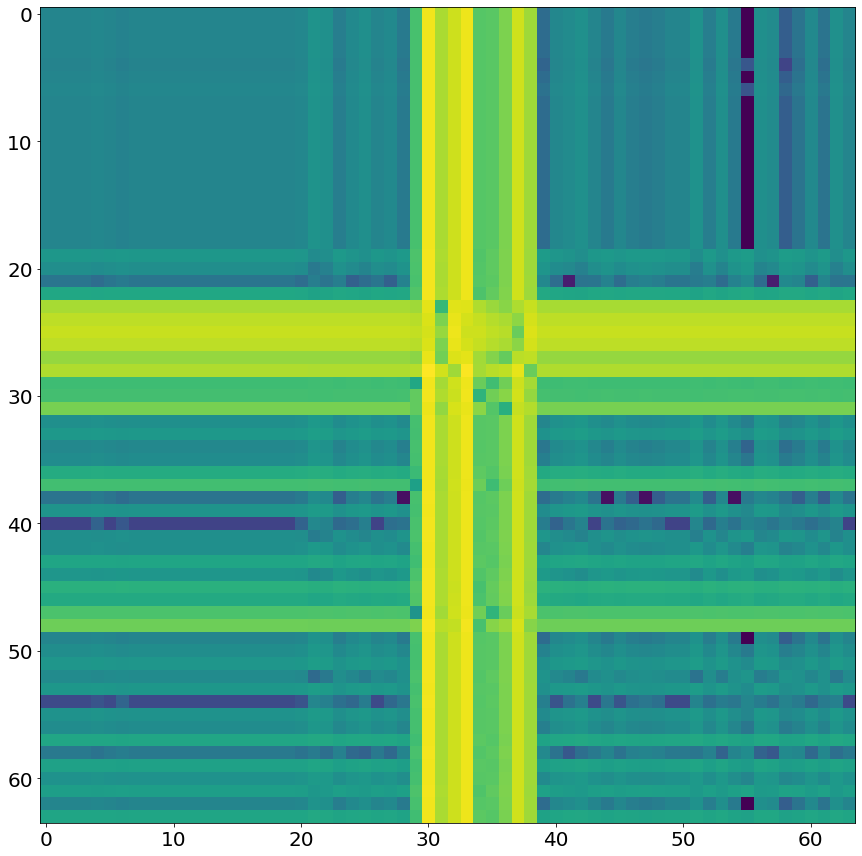

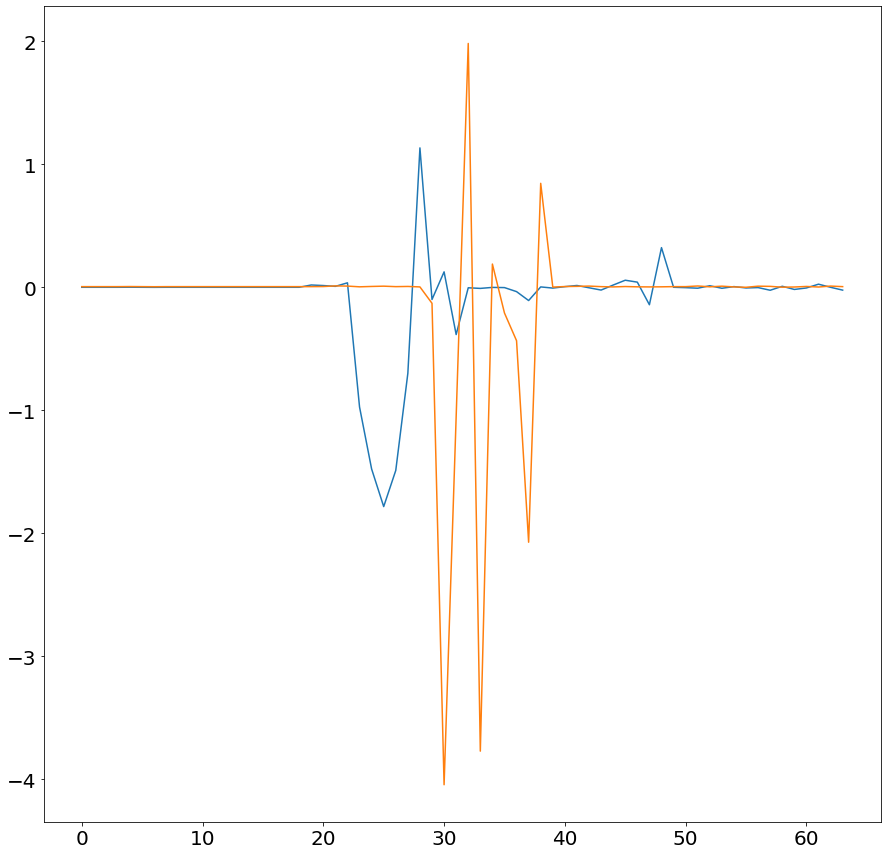

In [34]:
# DTW distance to a file with a different sound bite, normalized
print("dtw distance: ", dtw(X[0][::restep], X[1][::restep]))
dtw_plotter(0, 1, restep)

Figure: same as figure above, but instead of plotting distance vs itself it plots the first waveform distance vs the second. Note this is of the same word so it makes sense that the distanc heat map looks similar to the first figure, but more spread out showing the disimimilarity between X[0] and X[1].

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in short_scalars


dtw distance:  216485.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


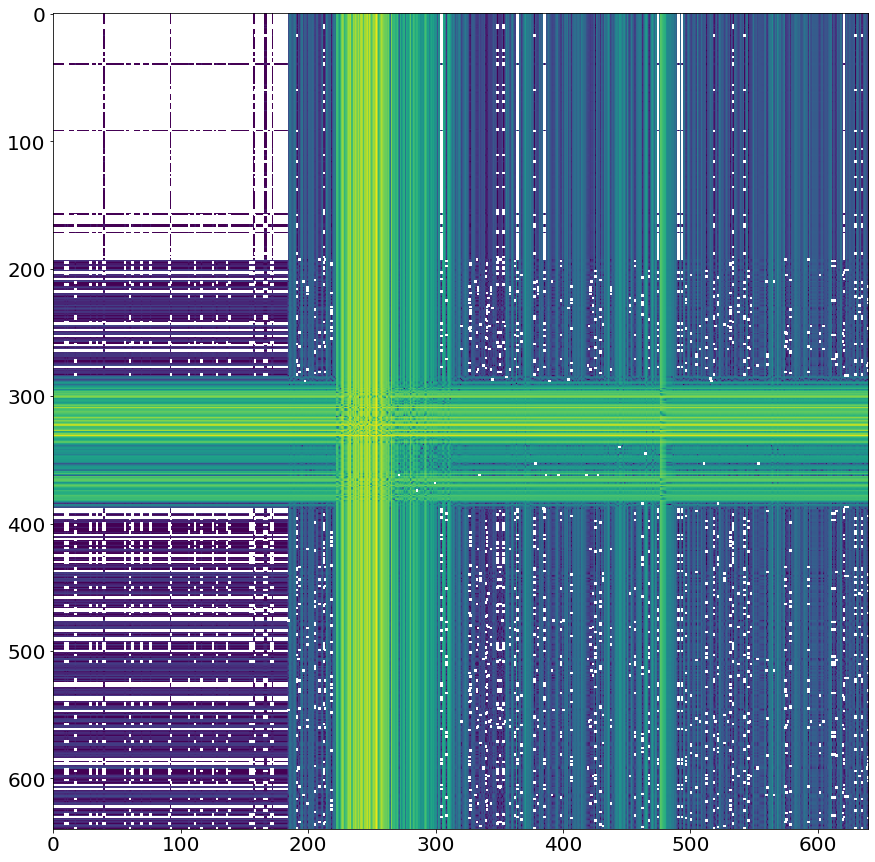

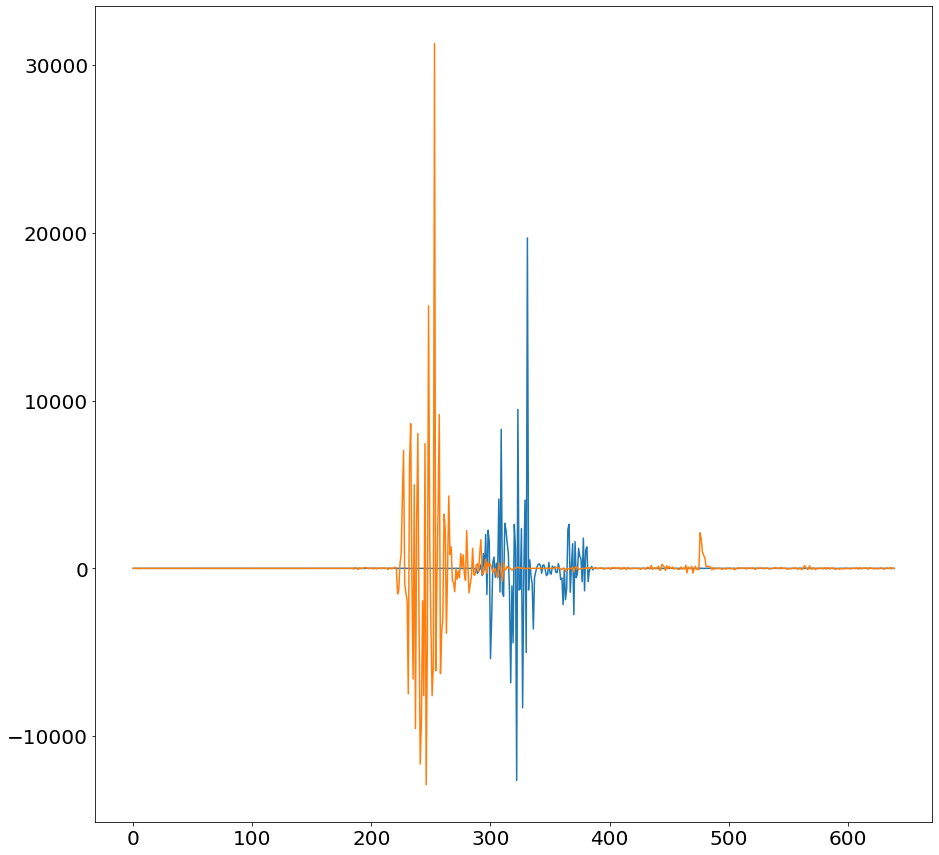

In [48]:
# DTW distance to a file with a different sound bite, normalized
step = 10
restep = 10
print("dtw distance: ", dtw(wavfiles[0][::step*restep], wavfiles[1][::step*restep]))
pl.imshow(np.log10(cdist(np.atleast_2d(wavfiles[0][::step*restep]).T, 
                np.atleast_2d(wavfiles[1][::step*restep]).T,
      metric=dtw)))
pl.show()
pl.plot(wavfiles[0][::step*restep])
pl.plot(wavfiles[1][::step*restep]);

Figure: Same as figure above, but using the original waveforms before preprocessing (not normalized). Significantly different numbers, but we can see the heatmap cross as 200-300 vs 300-400 instead, relating to the normalized cross at 20-30 vs 30-40. Note that more of the blue waveform is to the "right" of the orange in the non-normalized, but to the left in normalized


In [0]:
restep = 100

dtw distance:  12.125746133323698


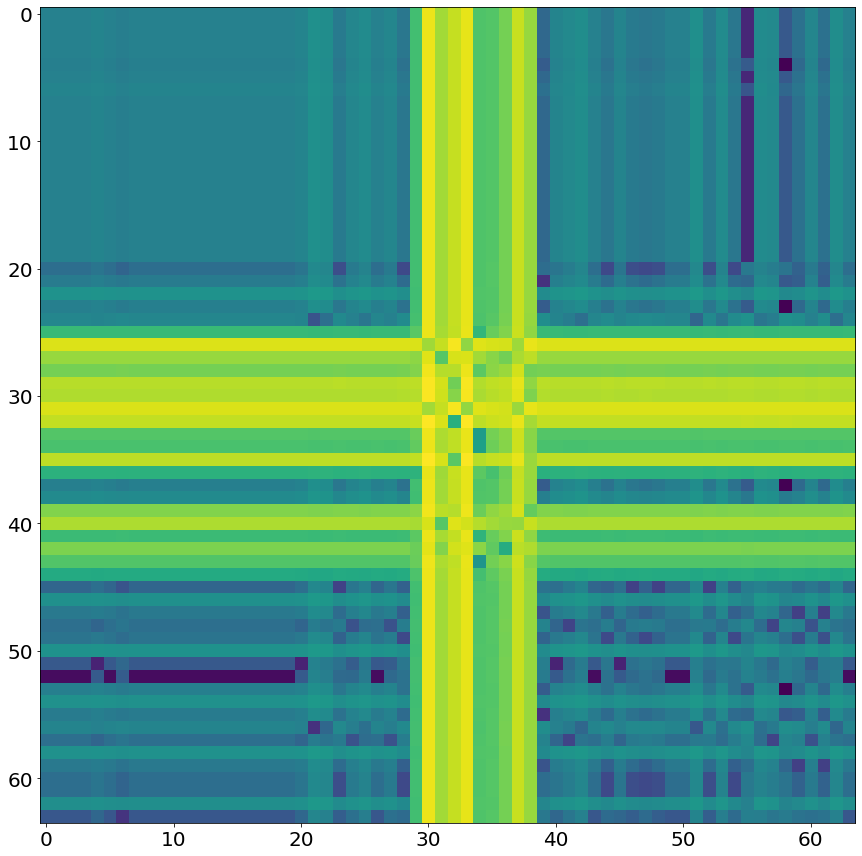

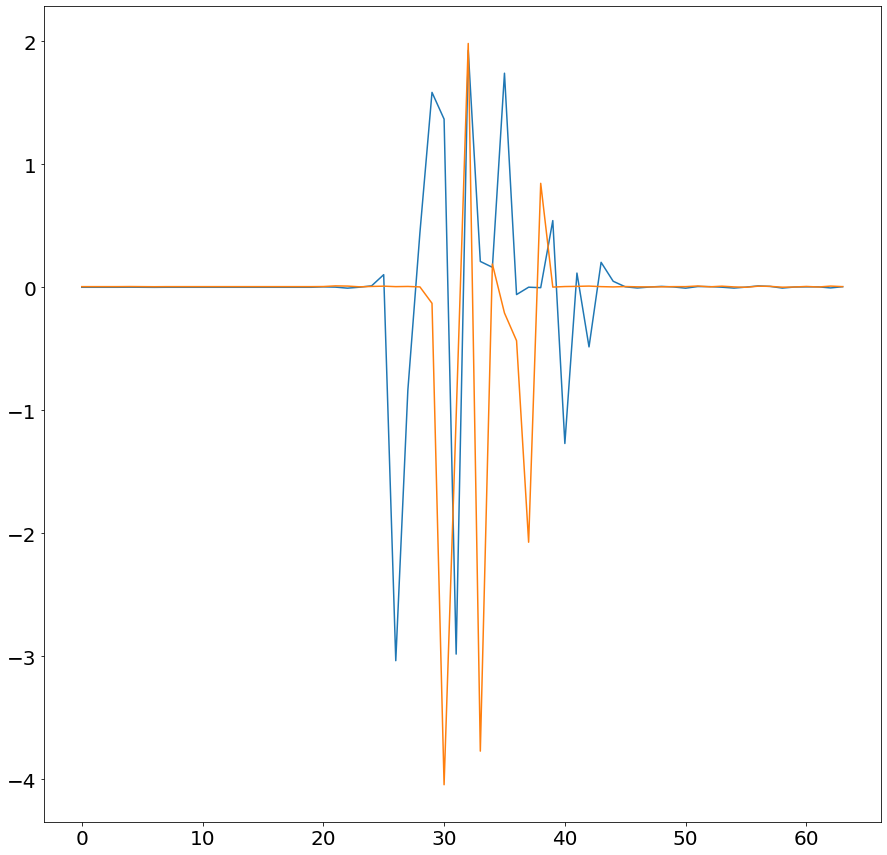

In [50]:
# DTW distance to a file with a different sound bite
print("dtw distance: ", dtw(X[0][::restep], X[24][::restep]))
dtw_plotter(0, 24, restep)

Figure: dtw distance for 2 waveforms of different time series (different words). Does not show the same single cross pattern as previous figures, instead has a double cross with a lot more spread. 

# 2 What is the nearest neighbor of the first sound bite?

In [37]:
# what is most similar to the first time series? (other than itself)
restep = 10
distances = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distances[i] = dtw(X[0][::restep], X[i][::restep]);


0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [38]:

distances.argsort()

array([ 0,  3,  2,  1, 24, 13,  4,  5,  8, 22, 19, 15,  6, 16, 11, 12, 18,
        7,  9, 17, 10, 14, 23, 20, 21])

In [39]:
print("Based on its nearest neighbor the first sound bite says...")
print(y[distances.argsort()[1]])

Based on its nearest neighbor the first sound bite says...
Jarvis


## *task 4: Classify the 20th sound bite based on its nearest neighor with Euclidean and DTW distance*

In [40]:
# what is most similar to the first time series? (other than itself)
distancesE = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesE[i] = euclidean(X[19], X[i]);



0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [41]:
distancesE.argsort() #0 is itself

array([19,  0, 11, 18,  8, 12,  6, 16,  2, 14, 22,  3, 17, 21,  1,  4, 13,
        9, 10, 15,  5, 23, 24, 20,  7])

In [42]:
print("Based on its nearest neighbor and Euclidian distance ",
      "the last sound bite says...")
print(y[distancesE.argsort()[1]])
print("Correct!") if y[distancesE.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and Euclidian distance  the last sound bite says...
Jarvis
Sorry...


In [43]:
# what is most similar to the first time series? (other than itself)
distancesDTW = np.zeros(25) * np.nan
for i in range(25):
    print(i, "/25")
    distancesDTW[i] = dtw(X[19][::steps], X[i][::steps]);

0 /25
1 /25
2 /25
3 /25
4 /25
5 /25
6 /25
7 /25
8 /25
9 /25
10 /25
11 /25
12 /25
13 /25
14 /25
15 /25
16 /25
17 /25
18 /25
19 /25
20 /25
21 /25
22 /25
23 /25
24 /25


In [44]:
y[19]

'Tontt'

In [45]:
print("Based on its nearest neighbor and DTW distance ",
      "the last sound bite says...")
print(y[distancesDTW.argsort()[1]])
print("Correct!") if y[distancesDTW.argsort()[1]] == y[19] else print("Sorry...")

Based on its nearest neighbor and DTW distance  the last sound bite says...
Tofftl
Sorry...
